In [1]:
import numpy as np
from sklearn.decomposition import PCA

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=2)

PCA(n_components=2)

In [3]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [4]:
print(pca.components_)

[[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]


In [6]:
components = np.array(pca.components_)
components.shape

(2, 2)

In [7]:
X.shape

(6, 2)

In [11]:
v = np.matmul(components, np.transpose(X))

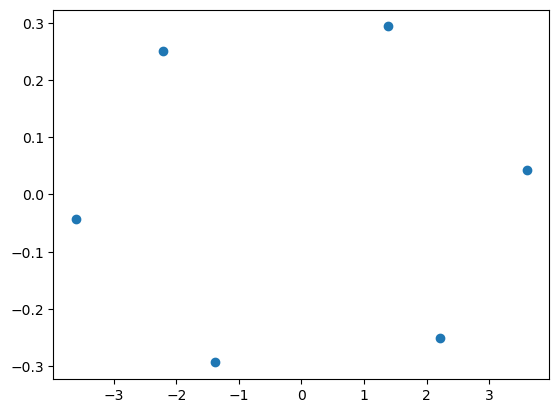

In [12]:
import matplotlib.pyplot as plt
plt.scatter(v[0], v[1])

In [80]:
# More practice, from cs168 notes
X = np.array([[10, 1, 2, 7], [7, 2, 1, 10], [2, 9, 7, 3], [3, 6, 10, 2]])

# Centering the data
x_hat = np.mean(X, axis=0)
X_cen = X - np.tile(x_hat, (len(X), 1))

In [81]:
x_hat

array([5.5, 4.5, 5. , 5.5])

In [82]:
X_cen

array([[ 4.5, -3.5, -3. ,  1.5],
       [ 1.5, -2.5, -4. ,  4.5],
       [-3.5,  4.5,  2. , -2.5],
       [-2.5,  1.5,  5. , -3.5]])

In [83]:
# compute *sample* deviation
#sample_dev = np.sqrt(np.sum(X_cen * X_cen, axis=0))
#X_fin = X_cen / sample_dev

In [87]:
pca = PCA(n_components=2)
pca.fit(X_cen)
PCA(n_components=2)

PCA(n_components=2)

In [88]:
components = np.array(pca.components_)
components.shape
print(components)

[[-0.47699896  0.47595619  0.56131504 -0.48048217]
 [ 0.52196553 -0.52137312  0.47527418 -0.47941267]]


In [89]:
# project the data onto the components
a = np.matmul(components, np.transpose(X_cen))
print(a)

[[-6.21701039 -6.31281886  6.13513476  6.39469449]
 [ 2.02870927 -1.97207263 -2.02397837  1.96734174]]


In [92]:
np.transpose(np.dot(np.transpose(components), a) + np.tile(x_hat, (4, 1))) - X

array([[-0.47557617,  0.48326091,  0.97449172,  0.51457374],
       [-0.51814588,  0.52356042, -0.98075536, -1.52136649],
       [-0.98289987, -0.02469669,  0.48179873,  0.02249799],
       [ 0.47662192,  1.51787536,  0.02446491, -0.51570525]])

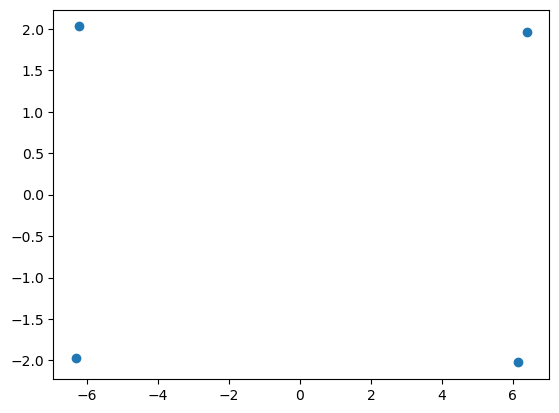

In [93]:
# plot the projections
plt.scatter(a[0], a[1])